In [ ]:
from homomesy.homomesy import *
from ipywidgets import interact_manual, interact, fixed
import ipywidgets as widgets
from sage.all import *
from sage.databases.findstat import FindStatMaps, FindStatStatistics
import requests
import json
findstat()._allow_execution = True
from sage.rings.rational_field import QQ
from dataclasses import dataclass
from sage.dynamics.finite_dynamical_system import FiniteDynamicalSystem
from sage.structure.parent import Parent
import matplotlib.pyplot as plt
import numpy as np
from itertools import product






done downloading data
printing stats...
{'Permutations': CollectionWithMapsAndStats(collection=<class 'sage.combinat.permutation.Permutations'>, name='Permutations', stats=[St000001: The number of reduced words for a permutation., St000002: The number of occurrences of the pattern 123 in a permutation., St000004: The major index of a permutation., St000007: The number of saliances of the permutation., St000018: The number of inversions of a permutation., St000019: The cardinality of the support of a permutation., St000020: The rank of the permutation., St000021: The number of descents of a permutation., St000022: The number of fixed points of a permutation., St000023: The number of inner peaks of a permutation., St000028: The number of stack-sorts needed to sort a permutation., St000029: The depth of a permutation., St000030: The sum of the descent differences of a permutations., St000031: The number of cycles in the cycle decomposition of a permutation., St000033: The number of permut

In [4]:
def yield_all_toggles(n: int):
    for i in range(n - 1):
        l = list(range(1,n + 1))
        l[i], l[i + 1] = l[i + 1], l[i]
        yield Permutation(l)

#all_collections = get_all_collections()

all_toggles = list(yield_all_toggles(4))
all_toggles

[[2, 1, 3, 4], [1, 3, 2, 4], [1, 2, 4, 3]]

In [5]:
findstat()._allow_execution = False

park = all_collections["Parking functions"].collection(len(all_toggles) + 1)
for perm in Permutations(len(all_toggles)):
    comb_toggle = None
    comb_toggle_str = ""
    for i, e in enumerate(perm):
        if comb_toggle is None:
            comb_toggle = all_toggles[e - 1]
            comb_toggle_str = all_toggles[e - 1].cycle_string()
        else:
            comb_toggle = comb_toggle * all_toggles[e - 1]
            comb_toggle_str = all_toggles[e - 1].cycle_string() + comb_toggle_str
    print(f"permutation: {comb_toggle.cycle_string()} = {comb_toggle_str}")
    cycles = list(lazy_cycles(FiniteDynamicalSystem(park, lambda x: ParkingFunction(comb_toggle.action(x)))))
    for stat in all_collections["Parking functions"].stats:
        r = is_homomesic_with_debug_and_set_cycles(cycles, stat)
        if r.is_homomesic():
            print("Homomesic with statistic:", stat.name)
            #r.print_all_cycles()

permutation: (1,4,3,2) = (3,4)(2,3)(1,2)
Homomesic with statistic: <bound method FindStatFunction.name of St001903: The number of fixed points of a parking function.>
permutation: (1,3,4,2) = (2,3)(3,4)(1,2)
Homomesic with statistic: <bound method FindStatFunction.name of St001903: The number of fixed points of a parking function.>
permutation: (1,2,4,3) = (3,4)(1,2)(2,3)
Homomesic with statistic: <bound method FindStatFunction.name of St001903: The number of fixed points of a parking function.>
permutation: (1,2,4,3) = (1,2)(3,4)(2,3)
Homomesic with statistic: <bound method FindStatFunction.name of St001903: The number of fixed points of a parking function.>
permutation: (1,3,4,2) = (2,3)(1,2)(3,4)
Homomesic with statistic: <bound method FindStatFunction.name of St001903: The number of fixed points of a parking function.>
permutation: (1,2,3,4) = (1,2)(2,3)(3,4)
Homomesic with statistic: <bound method FindStatFunction.name of St001903: The number of fixed points of a parking function.

In [2]:
from math import comb

def number_of_fixed_points_permutations_helper(n, k):
    return comb(n, k) * (n - 1) ** (n - k)

def number_of_fixed_points_permutations(n):
    return [number_of_fixed_points_permutations_helper(n, k) for k in range(n + 1)]

def number_of_fixed_points_parking_functions(n):
    r = [0] * (n + 1)
    for p in all_collections["Parking functions"].collection(n):
        r[IntegerListWrapper.number_of_fixed_points(p)] += 1
        
    return r


    


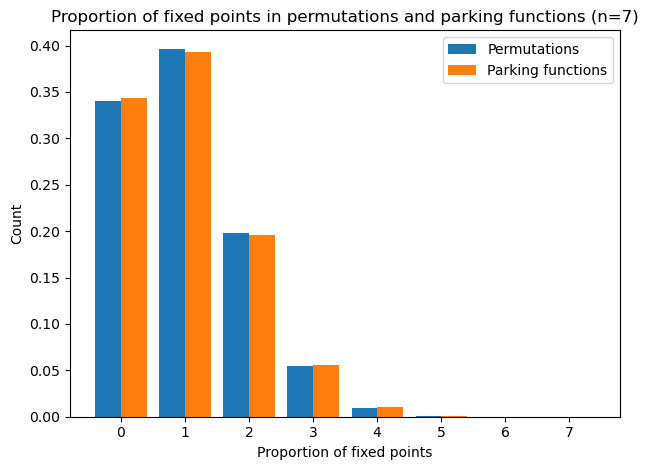

In [7]:
n = 7

width = 0.4 

x = list(range(n + 1))  

perm_counts = np.array(number_of_fixed_points_permutations(n), dtype=float)
park_counts = np.array(number_of_fixed_points_parking_functions(n), dtype=float)
perm_counts /= np.sum(perm_counts)
park_counts /= np.sum(park_counts)


x_perm = [xi - width / 2 for xi in x]
x_park = [xi + width / 2 for xi in x]


plt.bar(x_perm, perm_counts, width=width, label="Permutations")
plt.bar(x_park, park_counts, width=width, label="Parking functions")


plt.xlabel("Proportion of fixed points")
plt.ylabel("Count")
plt.title(f"Proportion of fixed points in permutations and parking functions (n={n})")
plt.xticks(x)  
plt.legend()
plt.tight_layout()
#plt.yscale('log')  
plt.show()

In [3]:
general_statistics = [
    first_entry,
    IntegerListWrapper.number_of_fixed_points,
    the_number_of_excedances,
    the_number_of_weak_excedances,
    the_number_of_non_cyclical_small_weak_excedances,
    the_number_of_cyclical_small_weak_excedances,
    the_number_of_small_excedances,
    the_number_of_non_small_weak_excedances,
    the_number_of_small_weak_excedances,
    the_number_of_non_small_excedances,
    the_number_of_cyclical_small_excedances,
    the_number_of_non_cyclical_small_excedances,
]

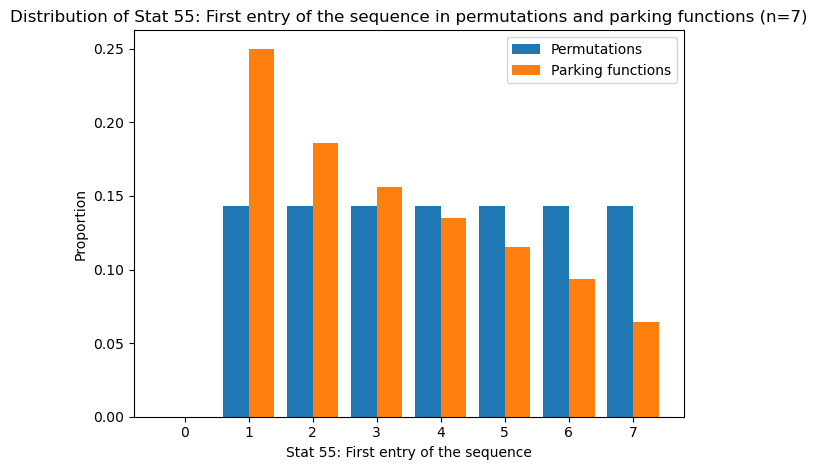

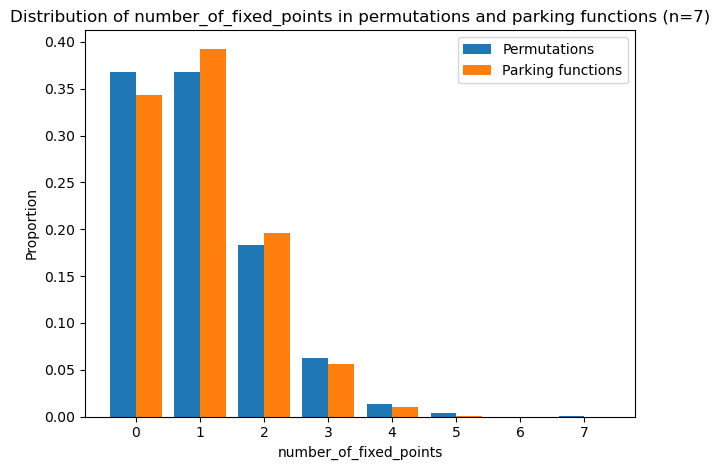

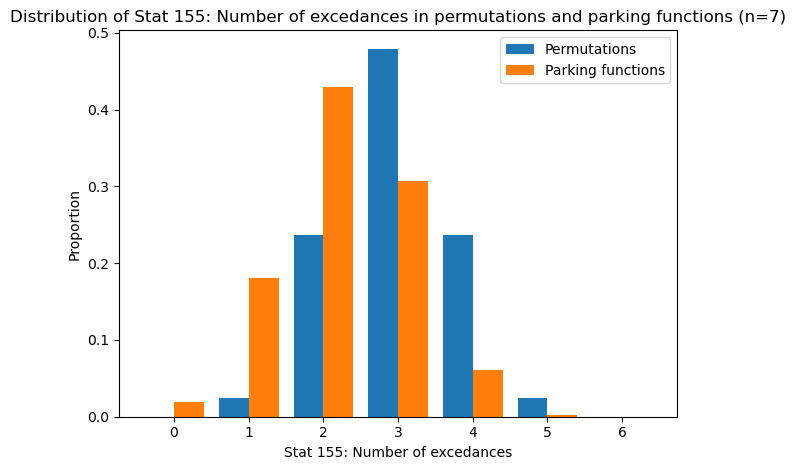

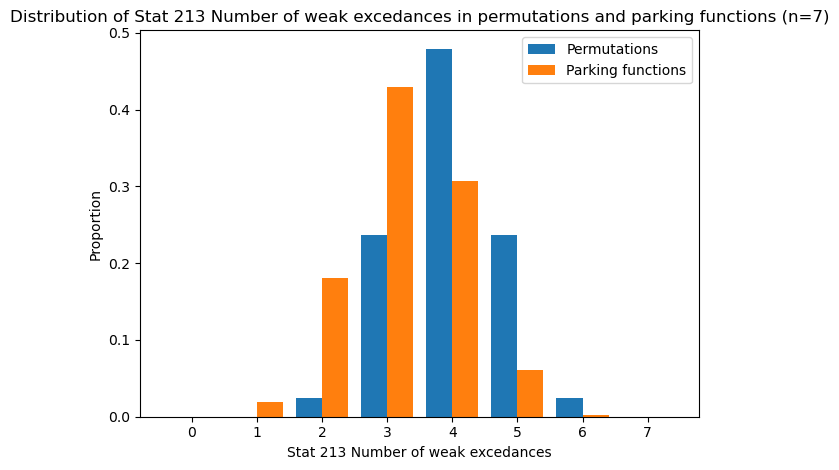

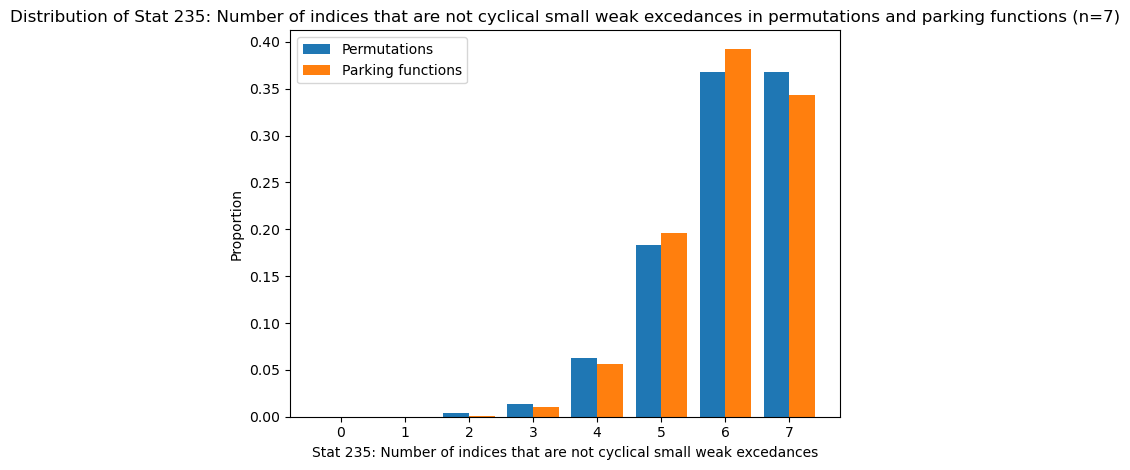

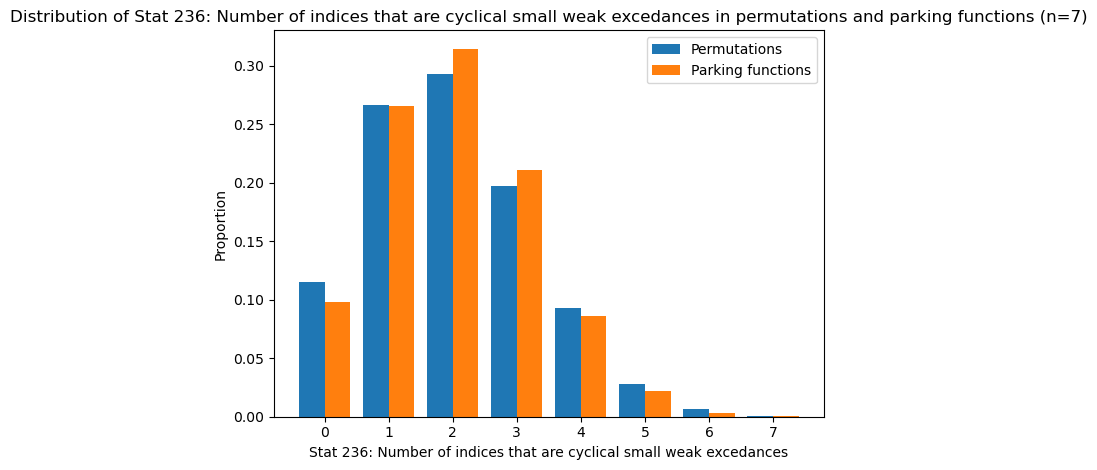

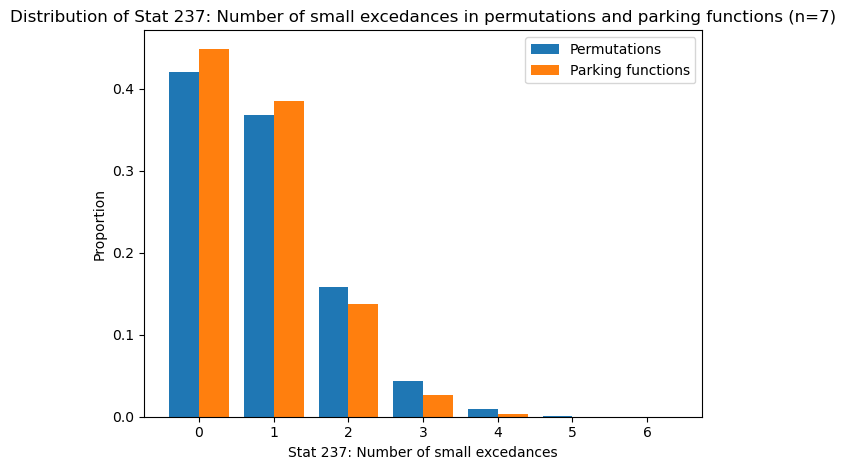

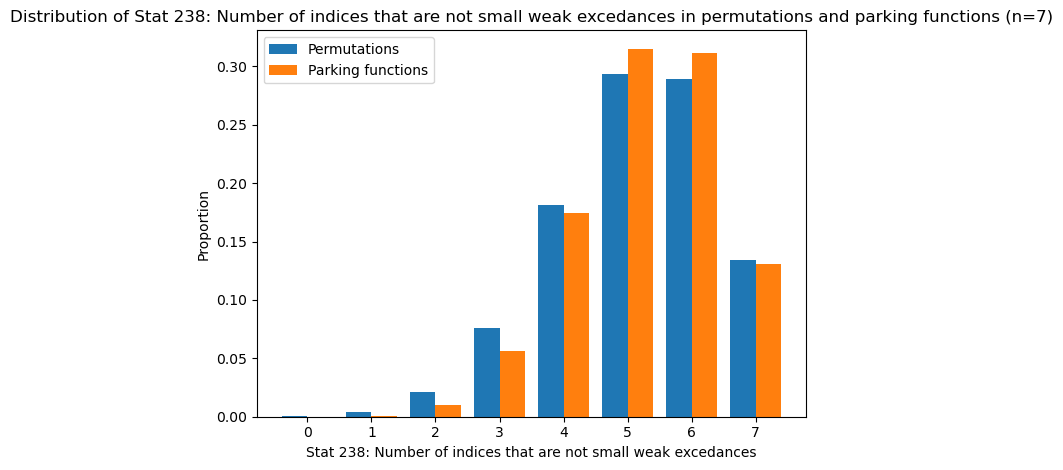

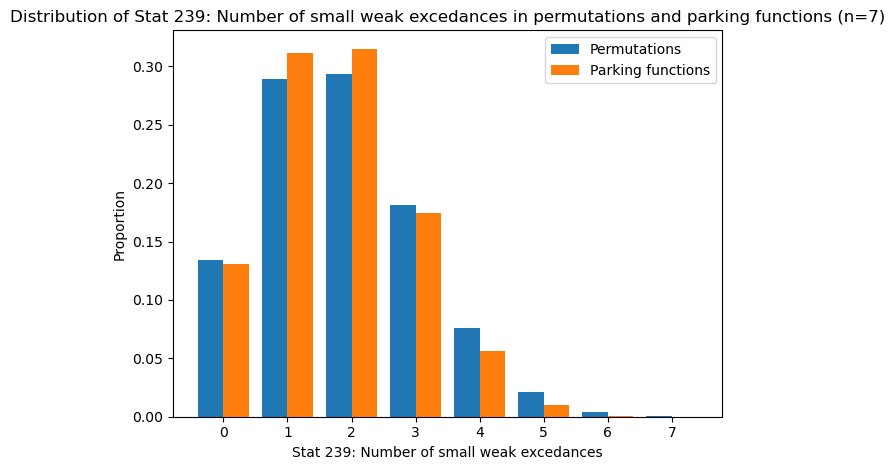

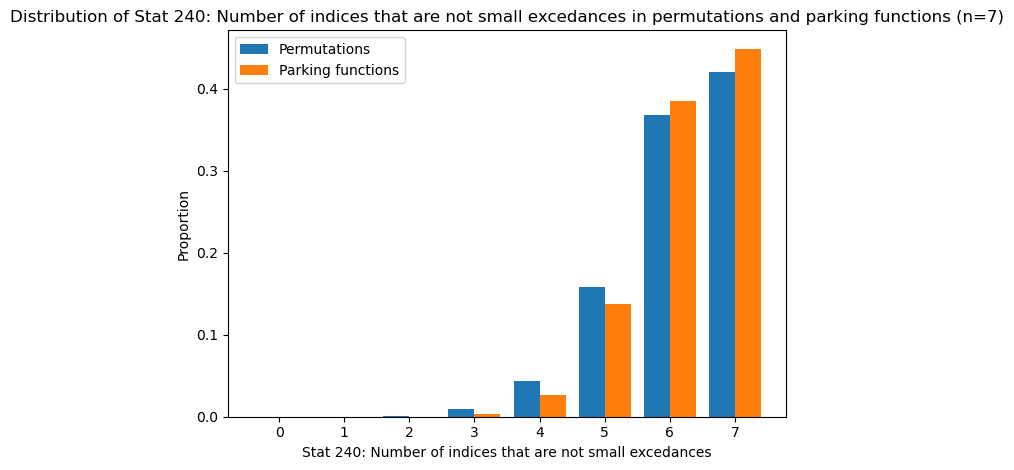

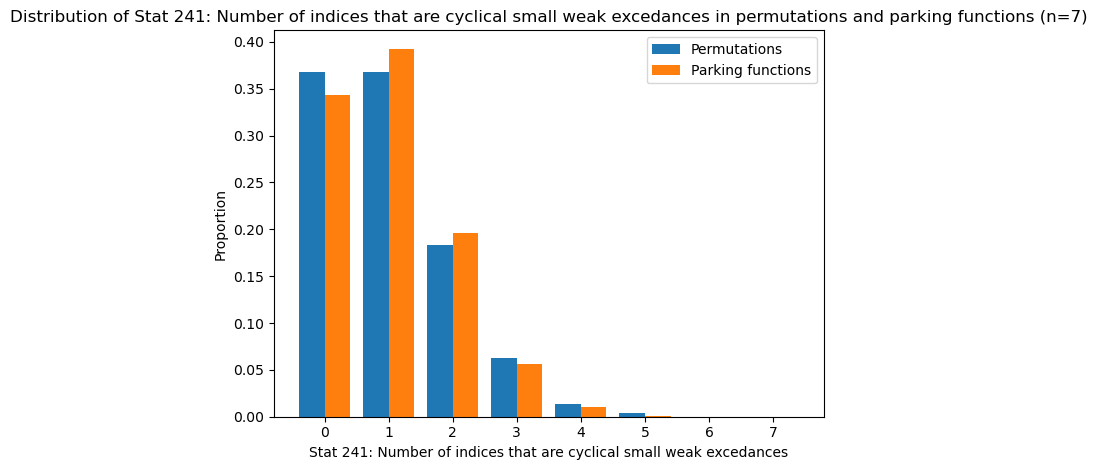

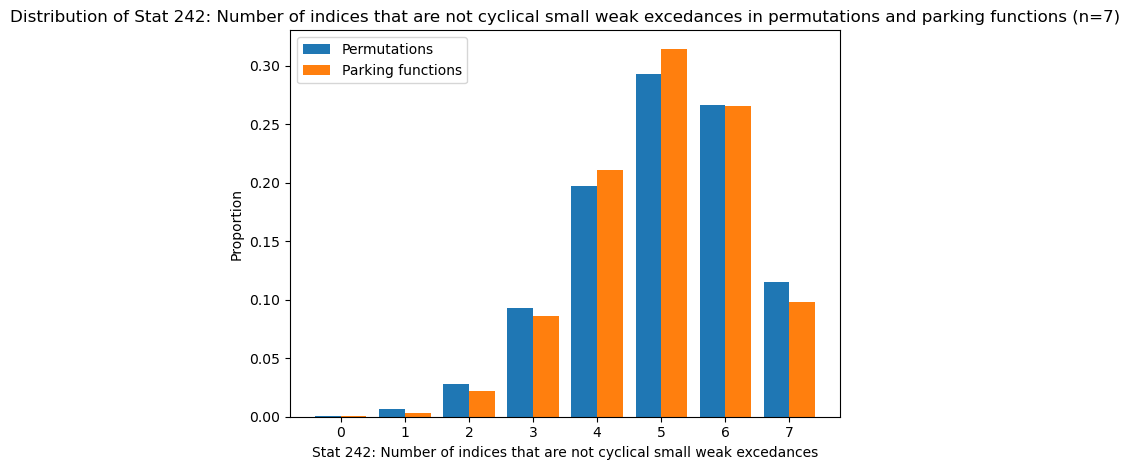

In [10]:
n = 7
width = 0.4

for stat in general_statistics:
    perm_stat_counts = []
    park_stat_counts = []
    for p in Permutations(n):
        v = stat(IntegerListWrapper(p))
        if len(perm_stat_counts) <= v:
            perm_stat_counts.extend([0] * (v - len(perm_stat_counts) + 1))
        perm_stat_counts[v] += 1
    for p in ParkingFunctions(n):
        v = stat(IntegerListWrapper(p))
        if len(park_stat_counts) <= v:
            park_stat_counts.extend([0] * (v - len(park_stat_counts) + 1))
        park_stat_counts[v] += 1
    perm_stat_counts = np.array(perm_stat_counts, dtype=float)
    park_stat_counts = np.array(park_stat_counts, dtype=float)
    perm_stat_counts /= np.sum(perm_stat_counts)
    park_stat_counts /= np.sum(park_stat_counts)
    
    x_perm = [xi - width / 2 for xi in range(len(perm_stat_counts))]
    x_park = [xi + width / 2 for xi in range(len(park_stat_counts))]
    
    plt.bar(x_perm, perm_stat_counts, width=width, label="Permutations")
    plt.bar(x_park, park_stat_counts, width=width, label="Parking functions")
    plt.xlabel(stat.__name__)
    plt.ylabel("Proportion") 
    plt.title(f"Distribution of {stat.__name__} in permutations and parking functions (n={n})")
    plt.xticks(range(len(perm_stat_counts)))
    plt.legend()
    plt.tight_layout()
    plt.show()
    

In [51]:
def plot_multiple(idx, sub_plot_count_x, sub_plot_count_y, title = None, n=7, width=0.4, show_sub_titles=True, save=False, figsize=None, shorten_subtitles=True):
    if not isinstance(idx, (list, tuple)):
        idx = [idx]
    fig, axs = plt.subplots(sub_plot_count_y, sub_plot_count_x, figsize=figsize)
    if len(idx) == 1:
        axs = [axs]
    if len(np.shape(axs)) == 1:
        axs = np.array([axs])
    axs = axs.flatten()
    relevant_stats = [stat for _idx, stat in enumerate(general_statistics) if _idx in idx]
    for i, stat in enumerate(relevant_stats):
        perm_stat_counts = []
        park_stat_counts = []
        for p in Permutations(n):
            v = stat(IntegerListWrapper(p))
            if len(perm_stat_counts) <= v:
                perm_stat_counts.extend([0] * (v - len(perm_stat_counts) + 1))
            perm_stat_counts[v] += 1
        for p in ParkingFunctions(n):
            v = stat(IntegerListWrapper(p))
            if len(park_stat_counts) <= v:
                park_stat_counts.extend([0] * (v - len(park_stat_counts) + 1))
            park_stat_counts[v] += 1
        perm_stat_counts = np.array(perm_stat_counts, dtype=float)
        park_stat_counts = np.array(park_stat_counts, dtype=float)
        perm_stat_counts /= np.sum(perm_stat_counts)
        park_stat_counts /= np.sum(park_stat_counts)

        x_perm = [xi - width / 2 for xi in range(len(perm_stat_counts))]
        x_park = [xi + width / 2 for xi in range(len(park_stat_counts))]

        min_x = min([i for i,v in enumerate(perm_stat_counts) if v > 0] + [i for i,v in enumerate(park_stat_counts) if v > 0])
        max_x = max([i for i,v in enumerate(perm_stat_counts) if v > 0] + [i for i,v in enumerate(park_stat_counts) if v > 0])

        x_perm = [xi for i, xi in enumerate(x_perm) if min_x <= i <= max_x]
        x_park = [xi for i, xi in enumerate(x_park) if min_x <= i <= max_x]
        
        perm_stat_counts = perm_stat_counts[min_x:max_x + 1]
        park_stat_counts = park_stat_counts[min_x:max_x + 1]

        axs[i].bar(x_perm, perm_stat_counts, width=width, label="Permutations")
        axs[i].bar(x_park, park_stat_counts, width=width, label="Parking functions")
        axs[i].set_xlabel(stat.__name__)
        axs[i].set_ylabel("Proportion")
        if show_sub_titles:
            if shorten_subtitles:
                axs[i].set_title(f"Distribution of {stat.__name__[:stat.__name__.index(':')]} in permutations and parking functions")
            else:
                axs[i].set_title(f"Distribution of {stat.__name__} in permutations and parking functions")

        axs[i].legend()
    if title is not None:
        fig.suptitle(title + f" (n={n})")
    plt.tight_layout()
    if save:
        plt.savefig(f"stat_{'-'.join(map(str, idx))}_n_{n}.svg")
    plt.show()

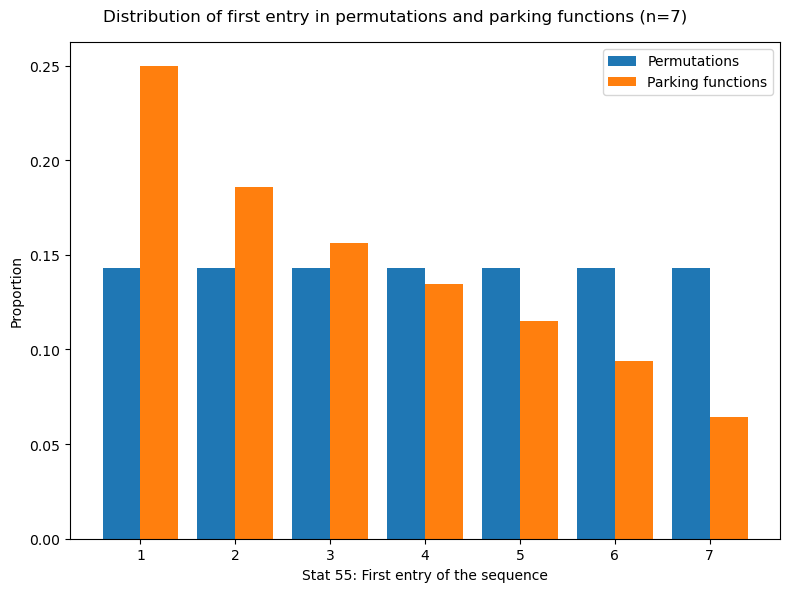

In [59]:
plot_multiple(0, 1, 1, "Distribution of first entry in permutations and parking functions", save=True, show_sub_titles=False, figsize=(8, 6))

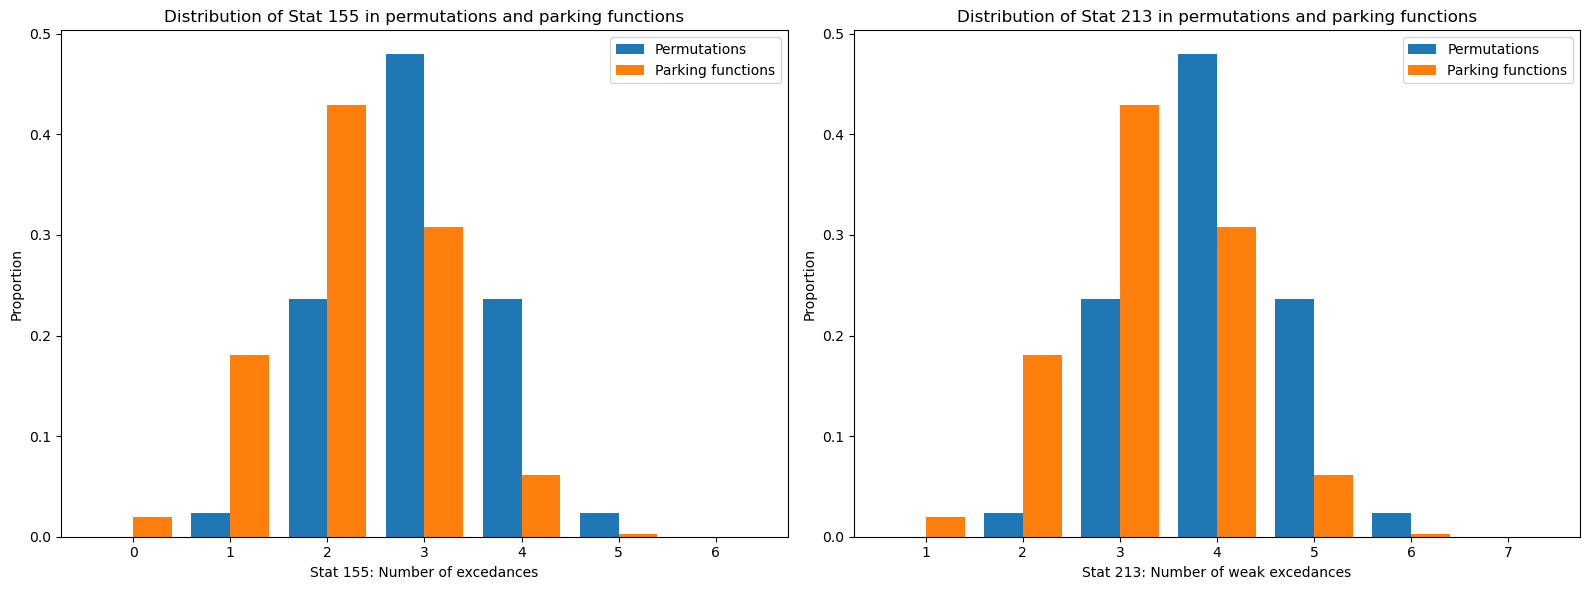

In [ ]:
plot_multiple((2,3), 2, 1, figsize=(16, 6), save=True)

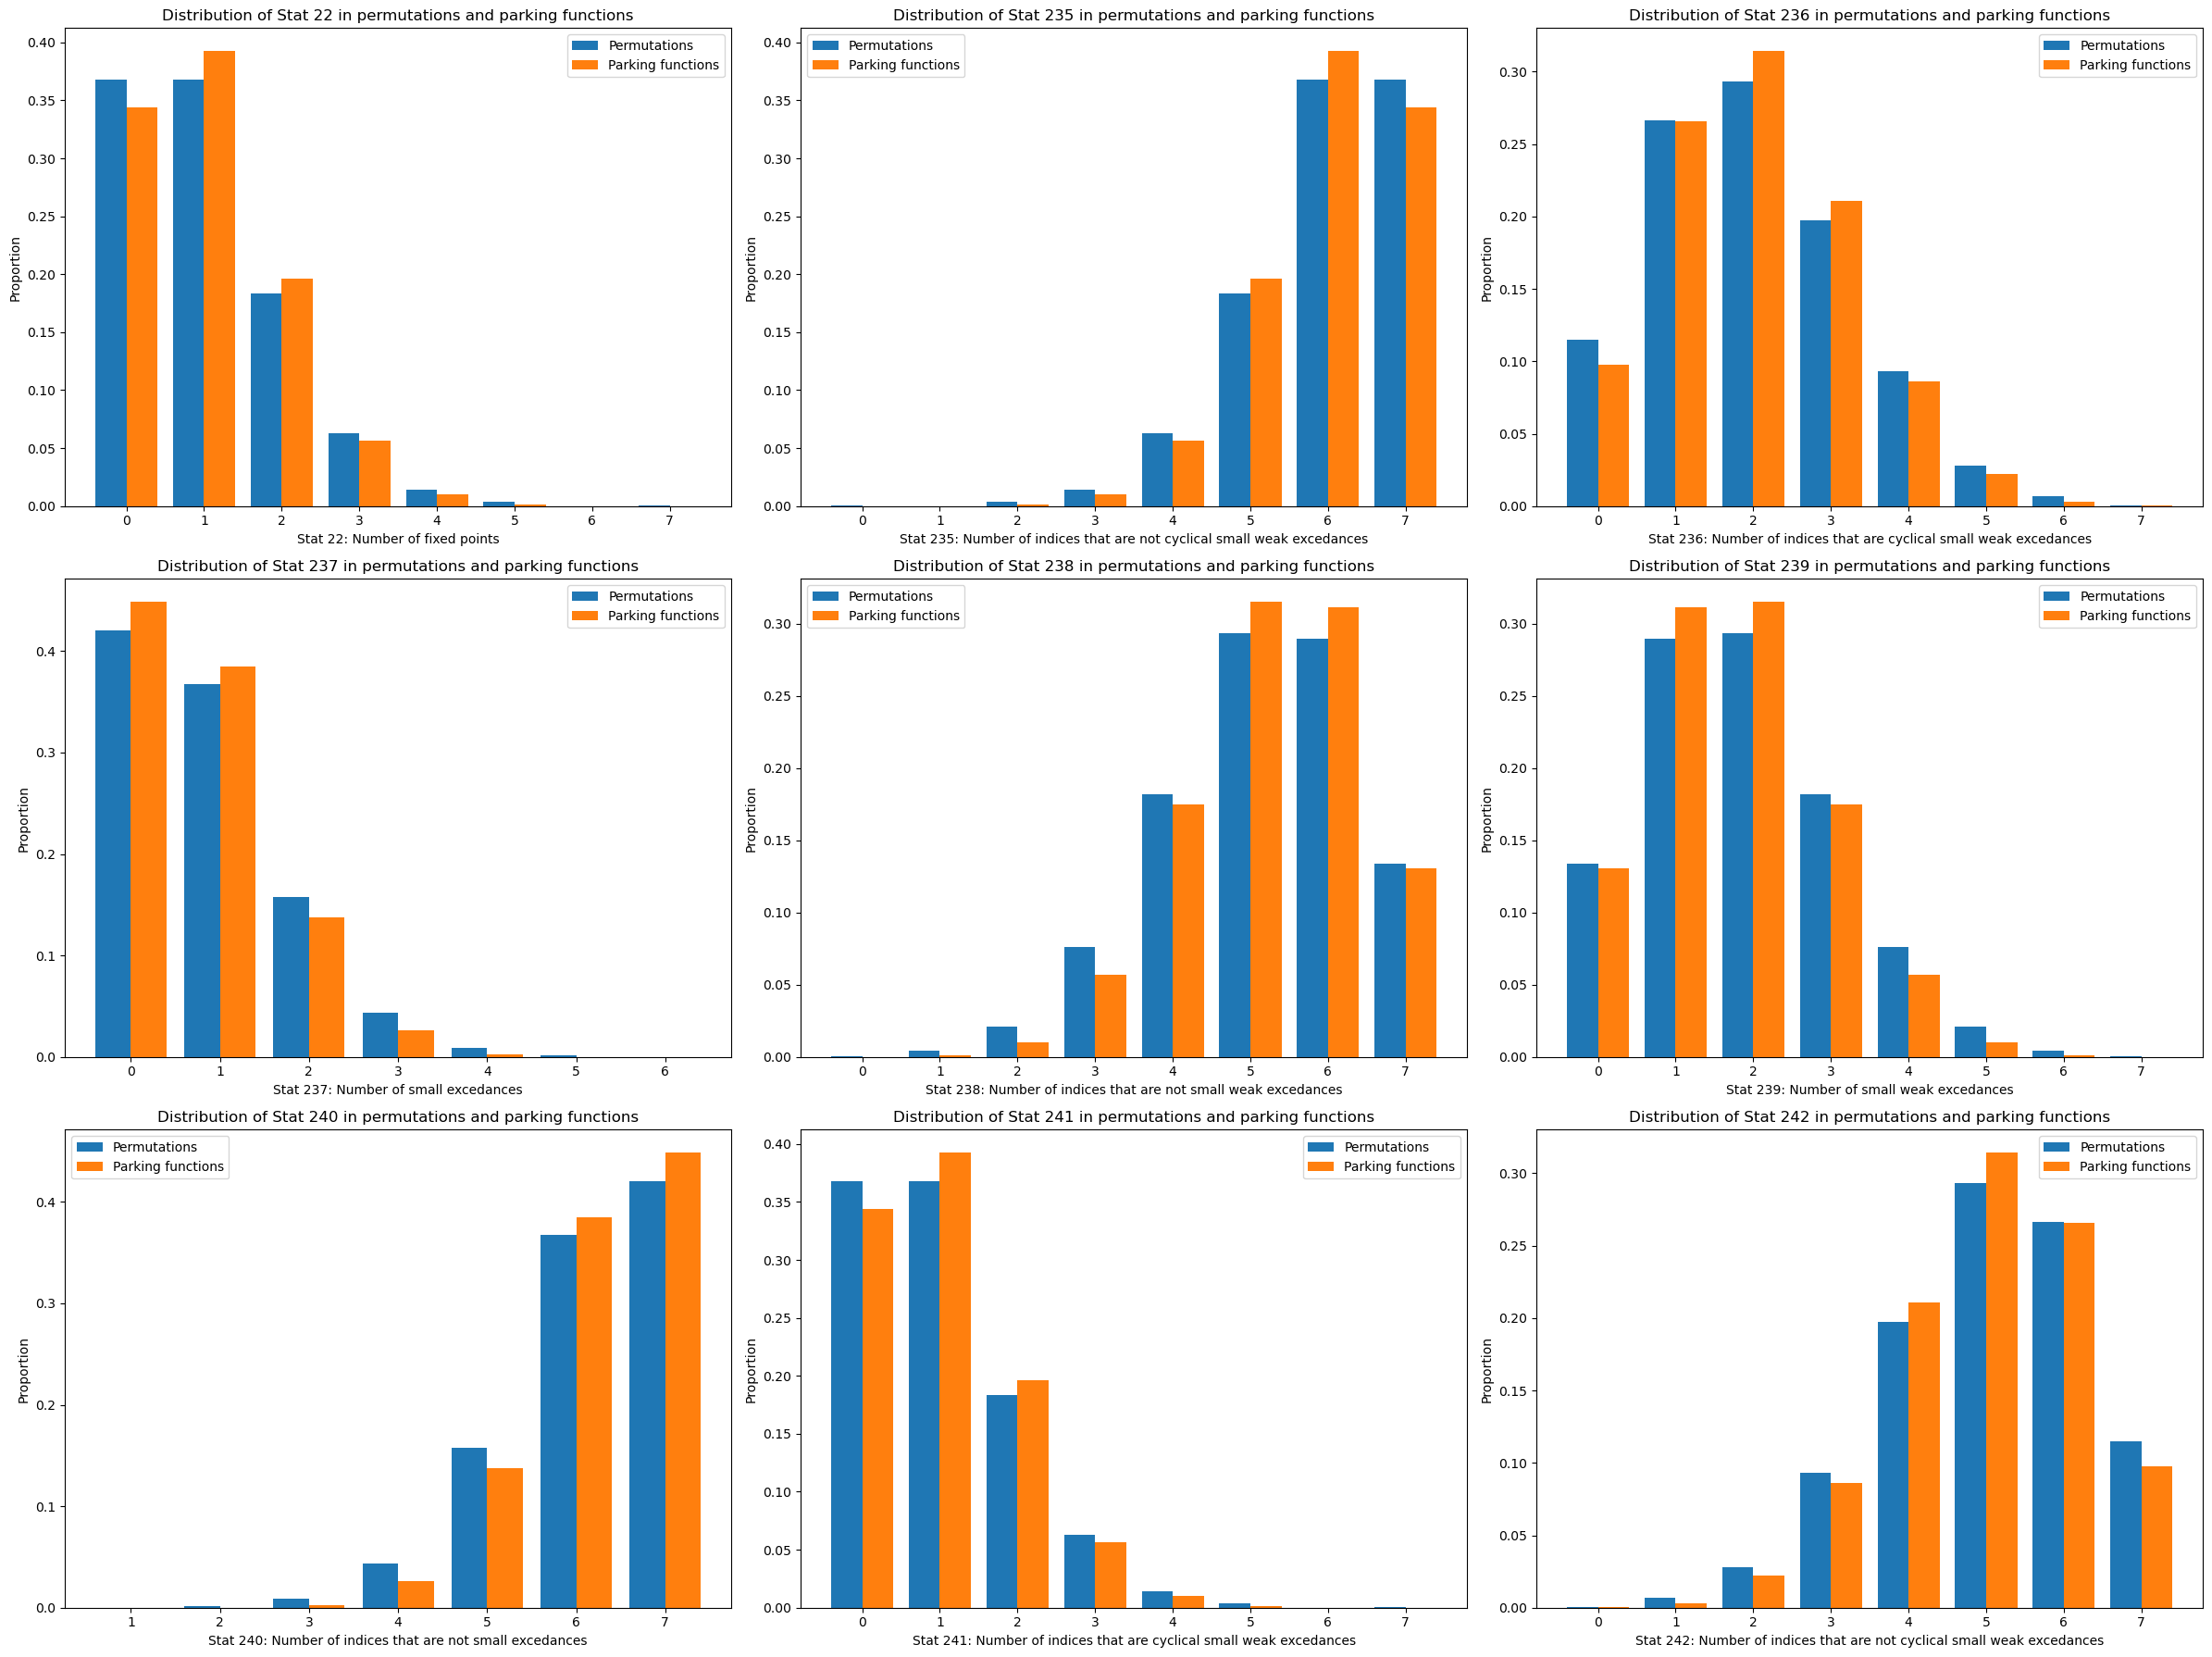

In [ ]:

plot_multiple((1,4,5,6,7,8,9,10,11), 3, 3, figsize=(24, 18), save=True)